In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 1.Data generation
np.random.seed(42)
X = np.linspace(-3, 3, 100)
# Actual function: y = xˆ2
y = X**2 + np.random.normal(0, 1.5, 100) # Adding noise
# X

In [3]:
# X.shape

In [4]:
# y

In [5]:
# y.shape

In [6]:
# reshape for sklearn
X = X.reshape(-1, 1)
# X.shape

In [7]:
y = y.reshape(-1, 1)
# y.shape

In [8]:
# 2. split data(70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# 3. train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Extracting model parameters
intercept = model.intercept_[0]
#print(intercept)
slope = model.coef_[0][0]
#print(slope)
Line_equation = f'y = {slope:.2f}x + {intercept:.2f}'
#print(Line_equation)

In [11]:
# predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [12]:
# Calculate Metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
#print(rmse_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#print(rmse_test)
r2_train = r2_score(y_train, y_train_pred)
#print(r2_train)
r2_test = r2_score(y_test, y_test_pred)
#print(r2_test)

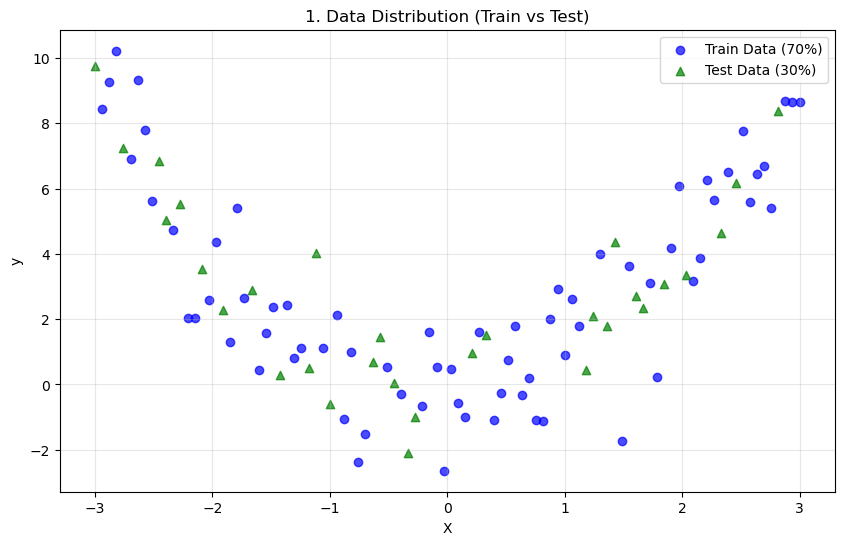

In [13]:
# plotting
# Plot 1:Only Data Distribution
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data (70%)', alpha=0.7)
plt.scatter(X_test, y_test, color='green', marker='^', label='Test Data (30%)', alpha=0.7)
plt.title('1. Data Distribution (Train vs Test)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


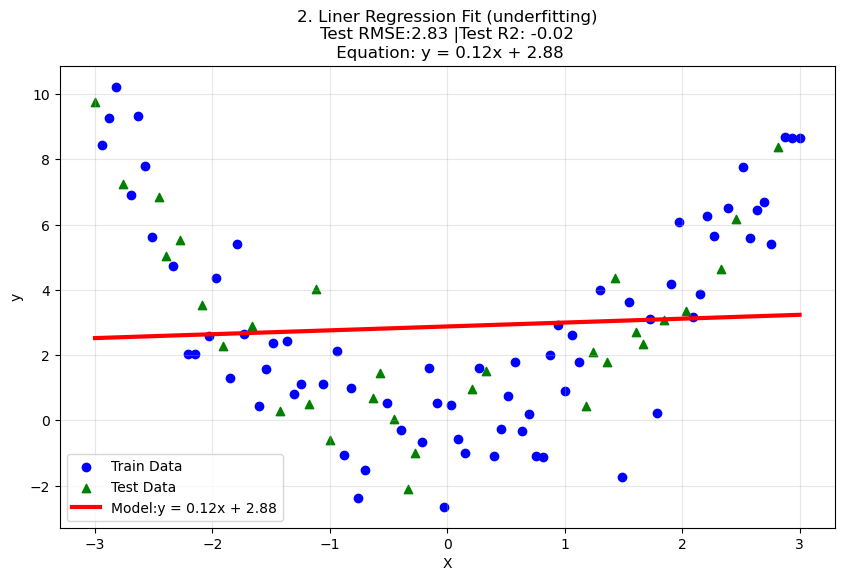

In [14]:
# 2. Plot Linear Resgression Fit With Equation
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', marker='^', label='Test Data')

plt.plot(X, model.predict(X), color='red', linewidth=3, label=f'Model:{Line_equation}')

# Added the equation to the title
plt.title(f'2. Liner Regression Fit (underfitting)\nTest RMSE:{rmse_test:.2f} |Test R2: {r2_test:.2f}\n Equation: {Line_equation}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


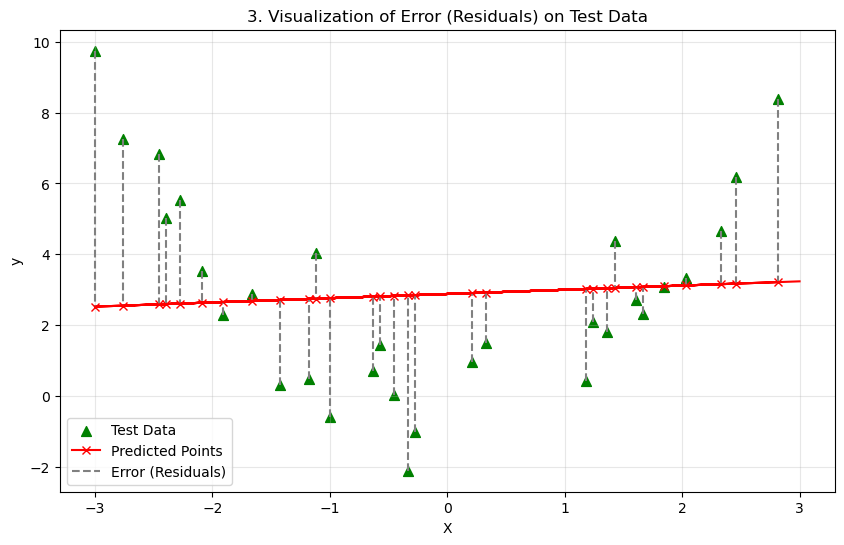

In [15]:
# 3 Plot. Residuals (Errors) Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='green', marker='^', label='Test Data', s=50)
plt.plot(X_test, y_test_pred, color='red', label='Predicted Points', marker='x')
plt.vlines(X_test, y_test, y_test_pred, color='gray', linestyle='--', label='Error (Residuals)')
plt.plot(X, model.predict(X), color='red')

plt.title('3. Visualization of Error (Residuals) on Test Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
# Printing Metrics and Equation
print('-'* 30)
print(f'Model Equation: {Line_equation}')
print('-'* 30)
print(f'Train Rmse: {rmse_train}')
print(f'Test Rmse: {rmse_test}')
print('-'* 30)
print(f'Train R2 score: {r2_train}')
print(f'Test R2 score: {r2_test}')
print('-'* 30)
print(f'intercept (Bias): {intercept}')
print(f'coefficient (Weight):{slope}')
print('-'* 30)

------------------------------
Model Equation: y = 0.12x + 2.88
------------------------------
Train Rmse: 3.2519162937542885
Test Rmse: 2.8300138656603573
------------------------------
Train R2 score: 0.00409556762105745
Test R2 score: -0.02115610726973638
------------------------------
intercept (Bias): 2.8806367265452724
coefficient (Weight):0.11891539062525486
------------------------------


In [17]:
# Polynominial
# new add to older than 
from sklearn.preprocessing import PolynomialFeatures

In [18]:
# 1 Data Genaration
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
# Actual function: y = xˆ2
y = X**2 + np.random.normal(0, 1.5, 100).reshape(-1, 1)# Adding noise

In [19]:
# 2. Split Data(70% Train , 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# 3. Feature Transformation (Degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [21]:
# 4. Train model
model = LinearRegression()
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
# Extracing Polynomial Equation
# model.coen_[0] contains [w_0, w_1, w_2] correspinding to [1, x, xˆ2]
weights = model.coef_[0]
#print(weights)
bias = model.intercept_[0]
#print(bias)
poly_equation = f'y = {weights[2]:.2f}xˆ2 + {weights[1]:.2f}x + {bias:.2f}'
#print(poly_equation)
# Constructing the equation string:y = w2*xˆ2 + w1*x + b
# Note: weights[0] is usually 0 because 'bias' is handeld by model.intercept_

In [23]:
# predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [24]:
# Calculate Metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
#print(rmse_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#print(rmse_test)
r2_train = r2_score(y_train, y_train_pred)
#print(r2_train)
r2_test = r2_score(y_test, y_test_pred)
#print(r2_test)

In [ ]:
# Generating a smooth curve for plotting the model
x_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_seq_poly = poly.transform(X_seq)
y_seq_pred = model.predict(X_seq_poly)